# FORESEE - U(1)B Gauge Boson

### Load Libraries 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
import os
#src_path = "/Users/felixkling/Documents/GitHub/FORESEE/"
src_path = "/Users/abraham/Documents/GitHub/roshanFORESEE/"
sys.path.append(src_path)
import time
from src.foresee import Foresee, Utility, Model

from matplotlib import pyplot as plt

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:597: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boostlist(arr_particle, arr_boost):


## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [3]:
foresee = Foresee(path=src_path)

## 2. Specifying the Model: Leptophobic $U(1)_B$

The phenomenology of the U(1)$_B$ gauge boson $V$ coupled to DM $\chi$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} = \frac{1}{2} m_\chi^2 \chi^2 +  \frac{1}{2} m_{X}^2 X^2  - g_B/3 \sum \bar q \gamma^\mu q X_\mu + g_\chi X^\mu (\partial_\mu \chi^* \chi - \chi^* \partial_\mu \chi )
\end{equation}

Let us fix $m = m_X = 3m_\chi$ and $g = g_\chi = g_B$. In this case, the invisible decay width is

\begin{equation}
 \Gamma(X \to \chi\chi) = \frac{g_\chi^2 m_X}{64 \pi} \left( 1- \frac{4m_\chi^2}{m_X^2}\right)^{3/2} = \frac{g_\chi^2 m_X}{64 \pi} \left(\frac{5}{9}\right)^{3/2} 
\end{equation}

The model is characterized by the gauge boson mass $m_{V}$ and the coupling parameter $g$ as free parameters. For the search for these gauge bosons at forward experiments we need to know i) the *production rate*, ii) the *lifetime* and iii) possibly the *decay branching fractions* of $U(1)$ gauge bosons as function of those two parameters. All properties are specified in the `Model` class. We initialize it with the name of the model as argument. 

In [4]:
energy = "13.6"
modelname="U(1)B" 
model = Model(modelname, path="./")

nsample_use = 100

**Production** Most LLPs are produced in the decay of primary particles. Here we need to specify the total branching fraction into the LLP as function of the `coupling` and the `mass`. We additionally specify the variable `nsample` which specifies how often each parent particle is decayed. 

For a pseudoscalar meson P($=\pi,\eta,\eta'$) with total width $\Gamma_P$ and a new vector boson X, we get

\begin{align}
BR( P \to X\gamma \to \pi^0\gamma\gamma)&=\frac{\Gamma(P\to X\gamma)}{\Gamma(P\to\gamma\gamma)}\frac{\Gamma(P\to\gamma\gamma)}{\Gamma_{P}}{\rm BR}(X\to \pi^0\gamma)\\
&=\frac{\Gamma(P\to X\gamma)}{\Gamma(P\to\gamma\gamma)}{\rm BR}(P\to\gamma\gamma){\rm BR}(X\to \pi^0\gamma)
\end{align}

The theory prediction for the width ratio (see eq.120 of low_energy.pdf) is
\begin{align}
\frac{\Gamma_{P\to X\gamma}}{\Gamma_{P\to \gamma\gamma}}=2\left(\frac{g_X}{e}\right)^2\left(1-\frac{m_X^2}{m_P^2}\right)^3\frac{|\sum_a{\rm
  Tr}[T_PT^aQ]{\rm Tr}[T^a\mathbf{G_{Bq}}]{\rm BW}_{V^a}|^2}{|{\rm
  Tr}[T_PQ^2]|^2}
\end{align}
with $G_{Bq}=1/3~{\rm diag}(1,1,1)$.

Here, we use the experimental values from [PDG](https://pdg.lbl.gov/)
\begin{equation}
BR(\eta\to\gamma\gamma)=0.3941 \quad ,\quad BR(\eta'\to\gamma\gamma)=0.02307~\quad \text{and} \quad BR(\pi^0\to\gamma\gamma)=0.99
\end{equation}

For the new gauge boson, we have the branching fractions

\begin{align}
    \text{BR}(\pi^0 \to X \gamma) &= \frac12 (g_X/e)^2 \times \left(1-m_{X}^2/m_\pi^2\right)^3\times\text{BR}(\pi^0 \to \gamma\gamma)|{\rm BW}_{\omega}(m_X^2)|^2
    \quad\text{and}\\
    \text{BR}(\eta \to X \gamma) &= \frac{9}{32} (g_X/e)^2  \times \left(1-m_{X}^2/m_\eta^2\right)^3 \times\text{BR}(\eta \to \gamma\gamma) |{\rm BW}_{\omega}+{\rm BW}_{\phi}|^2\\
    \text{BR}(\eta' \to X \gamma) &= \frac{18}{49} (g_X/e)^2 \times \left(1-m_{X}^2/m_{\eta'}^2\right)^3\times\text{BR}(\eta' \to \gamma\gamma)  \times |\frac12 {\rm BW}_{\omega}-{\rm BW}_{\phi}|^2
\end{align}

In [5]:
model.add_production_2bodydecay(
    pid0 = "111",
    pid1 = "22",
    br = "0.5*0.99 * (coupling/0.3)**2 * pow(1.-pow(mass/self.masses('111'),2),3)*np.abs((1-mass**2/0.78265**2 - 0.00849/0.78265*1j)**(-1))**2",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = nsample_use,
)

model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "22",
    br = "9/32*0.3941 * (coupling/0.3)**2 * pow(1.-pow(mass/self.masses('221'),2),3)*np.abs((1-mass**2/0.78265**2 - 0.00849/0.78265*1j)**(-1)+(1-mass**2/1.019461**2-0.004249/1.019461*1j)**(-1))**2",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = nsample_use, 
)

model.add_production_2bodydecay(
    pid0 = "331",
    pid1 = "22",
    br = "18./49.*0.02307 * (coupling/0.3)**2 * pow(1.-pow(mass/self.masses('331'),2),3) * np.abs(0.5*(1-mass**2/0.78265**2 - 0.00849/0.78265*1j)**(-1) - (1-mass**2/1.019461**2-0.004249/1.019461*1j)**(-1))**2",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL'],
    energy = energy,
    nsample = nsample_use, 
)

We can also produce the $U(1)_{B}$ gauge bosons via it's resonant mixing with the SM vector mesons, in this case only the $\omega$ and $\phi$ mesons. Following [arXiv:1810.01879](https://arxiv.org/pdf/1810.01879.pdf) and [arXiv:1801.04847](https://arxiv.org/abs/1801.04847), we can write 

\begin{equation}
    \sigma(X) = \theta_V^2 \  \sigma(V)
    \quad\quad\text{with}\quad\quad
    \theta_V = \frac{f_v \times g}{g_V}  \frac{m_V^2}{m_{X}^2 - m_V^2 + i m_V \Gamma_V}
\end{equation}

Here $g_\omega = 17$, $g_\phi=-12.88$, $f_\omega=4$ and $f_\phi=1$. We can specify this production mode using `model.add_production_mixing()`. Since the $\rho$ contribution is absent in the $U(1)_B$ model, we use both other mixing terms.

In [6]:
model.add_production_mixing(
    pid = "223",
    mixing = "coupling * 4./17. * 0.78265**2/abs(mass**2-0.78265**2+0.78265*0.00849*1j)",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL'],
    energy = energy,
)

model.add_production_mixing(
    pid = "333",
    mixing = "coupling /12.88 * 1.019461**2/abs(mass**2-1.019461**2+1.019461*0.004249*1j)",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL'],
    energy = energy,
)

Particles can also be produced directly in collisions. In the case of $U(1)_{B}$ gauge bosons, this proceeds through Bremsstrahlung at lower masses or through Drell-Yan production at higher masses. The spectra for LLPs at some reference coupling need to be provided in the `files/direct` directory. We also provide an option to implement additional conditions in terms of the momentum `p`, in this case the requirement that pT of gauge boson produced in Bremssteahlung is smaller than 1 GeV.  

In [7]:
masses_brem = [ 
    0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
    0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
    0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
    0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
    0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
    0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
    0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
    1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
    2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]

model.add_production_direct(
    label = "Brem",
    energy = energy,
#     condition = "1./0.3**2 * p.pt<1",
    condition = ["p.pt<1", "p.pt<2", "p.pt<0.5"],
    coupling_ref=1,
    masses = masses_brem,
)

**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [8]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=1,
)

**Branching Fractions:** For most models, the branching fractions into particular decay channels are independent of the overall couplings. In this case, we can provide a set of tables of masses $m$ and branching fractions $BR(m)$ using `model.set_br_1d`. Alternatively, we can also provide table of masses $m$, couplings $g$ and brnaching fraction $BR(m,g)$ via `model.set_br_2d()`. In both cases, we need to specify a list of decay modes and a list of filenames with the corresponding data tables. 

In [9]:
branchings = [
    ["br_pigamma", "black"        , "solid" , r"$\pi\gamma$"         , 0.225, 0.50],
    ["br_3pi"    , "red"          , "solid" , r"$\pi^+\pi^-\pi^0$"   , 0.525, 0.03],
    ["br_KK"     , "magenta"      , "solid" , r"$KK$"                , 0.905, 0.03],
    ["br_ee"     , "blue"         , "solid" , r"$ee$"                , 0.110, 0.50],
    ["br_mumu"   , "dodgerblue"   , "solid" , r"$\mu\mu$"            , 0.205, 0.013],
]


model.set_br_1d(
    modes=np.array(branchings).T[0],
    finalstates=[[111,22], [211,-211,111], [321,-321],[11,-11],[13,-13]],
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [10]:
foresee.set_model(model=model)

Let's first look at one benchmark scenario with $m_{X}=0.3$ GeV and $g=1$ using the function `foresee.get_llp_spectrum()`. 

save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_223_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_223_EPOSLHC_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_223_SIBYLL_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_223_QGSJET_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_333_Pythia8-Forward_m_0.3.npy
save data to file: ./model/LLP_spectra/13.6TeV_333_EPOSLHC_m_0.3.npy
save dat

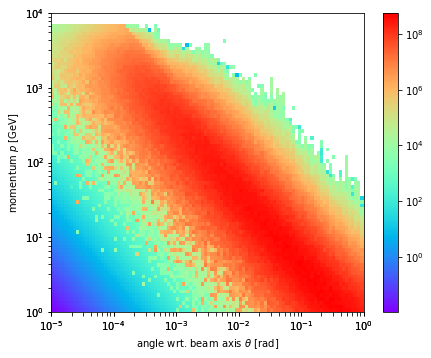

In [11]:
plt = foresee.get_llp_spectrum(0.3, coupling=1, do_plot=True)
plt.show()

We can now produce a set of LLP spectra for various masses and unit coupling and save them.  

In [12]:
masses = np.logspace(-1,0,21)

for mass in masses:
    foresee.get_llp_spectrum(mass=mass,coupling=1)

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

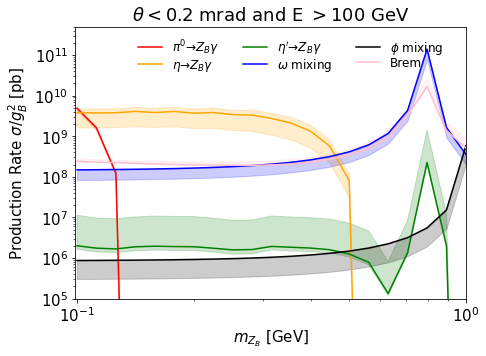

In [19]:
productions=[
    {"channels": ["111"], "color": "red", "label": r"$\pi^0 \to Z_B \gamma$", "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']},
    {"channels": ["221"], "color": "orange", "label": r"$\eta \to Z_B \gamma$", "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']},
    {"channels": ["331"], "color": "green", "label": r"$\eta ' \to Z_B \gamma$", "generators": ['EPOSLHC', 'SIBYLL', 'Pythia8-Forward']},

    {"channels": ["223"], "color": "blue", "label": r"$\omega$ mixing", "generators": ['EPOSLHC', 'SIBYLL', 'Pythia8-Forward']},
    {"channels": ["333"], "color": "black", "label": r"$\phi$ mixing", "generators": ['EPOSLHC', 'SIBYLL', 'Pythia8-Forward']},

    {"channels": ["Brem"], "color": "pink", "label": r"Brem", "generators": ["p.pt<0.5", "p.pt<1", "p.pt<2"]},
]



plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",  
    xlims=[0.099,1],ylims=[1e5,5e11],
    xlabel=r"$m_{Z_B}$ [GeV]",
    ylabel=r"Production Rate $\sigma/g_B^2$ [pb]",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=3,
)

plot.title(r"$\theta < 0.2$ mrad and E $> 100$ GeV")
plot.savefig("figures/"+modelname+"_production_channels_E100.pdf")

## 4. Count Eventrate in Detector

Before counting the number of decays within the detector volume, let us specify the detector geometry. Here we use the default for 2022+2023 data. 

In [12]:
distance, selection, length, luminosity, channels = 474, "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 1.5, 60, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

Let us look for one mass $m_{Z_B}=300$ MeV and $g_B=3\cdot 10^{-4}$ at how many particle decay inside the decay volume. The list `setups` defines three seups, with corresponding generators (for pions and eta) and pT cuts (for Brem) specified in `modes`. 

In [32]:
setups = ['Pythia8-Forward_pT=1', 'EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5']
modes = {
        '111': ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '221':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '331':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '223':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'],
         '333':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'],
         'Brem': ["p.pt<1", "p.pt<1", "p.pt<2", "p.pt<0.5"]
        }  

# setups = ['QGSJET']
# modes = {'111': ['QGSJET'], 
#          '221':['QGSJET'], 
#          '331':['QGSJET'], 
#          '223':['QGSJET'],
#          '333':['SIBYLL'],
#         }   
         
output = foresee.get_events(mass=0.3, energy=energy, couplings=[3e-4], modes=modes)
coups, ctaus, nsigs, momenta, weights = output
for coup,ctau,nsig in zip(coups, ctaus, nsigs):
    for i in range(len(nsig)): 
        print (type(nsig[i]))
        print ("coupling =", '{:5.3e}'.format(coup), setups[i], ": nsignal =", '{:5.3e}'.format(nsig[i]))

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:596: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boostlist(arr_particle, arr_boost):


<class 'numpy.float64'>
coupling = 3.000e-04 Pythia8-Forward_pT=1 : nsignal = 6.472e+01
<class 'numpy.float64'>
coupling = 3.000e-04 EPOSLHC_pT=1 : nsignal = 7.827e+01
<class 'numpy.float64'>
coupling = 3.000e-04 SIBYLL_pT=2 : nsignal = 6.744e+01
<class 'numpy.float64'>
coupling = 3.000e-04 QGSJET_pT=0.5 : nsignal = 2.244e+01


The previous function also outputs the energy distribution of the $U(1)_{B}$ gauge bosons which decay inside the detector. Let's have a look at them.

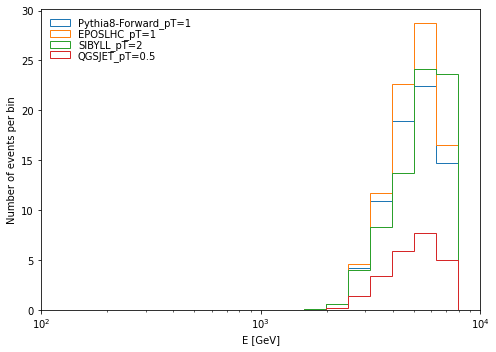

In [14]:
# fig = plt.figure(figsize=(7,5))
# ax = plt.subplot(1,1,1)
# for coup,momentum,weight in zip(coups,momenta,weights):
#     if sum(weight)<10**-5 : continue
#     ax.hist([p.e for p in momentum], weights=weight, bins=np.logspace(2,4, 20), histtype='step', label=r"$\epsilon=$"+str(coup)) 
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_ylim(10**-7,10**5) 
#     ax.set_xlabel("E(A') [GeV]") 
#     ax.set_ylabel("Number of Events per bin") 
#     ax.legend(frameon=False, labelspacing=0)
# plt.tight_layout()
# plt.show()

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
for coup,momentum,weight in zip(coups,momenta,weights):
    for w,label in zip(np.array(weight).T, setups):
        ax.hist([p.e for p in momentum], weights=w, bins=np.logspace(2,4, 20+1), histtype='step', label=label) 
    ax.set_xscale("log")
    ax.set_xlim(1e2,1e4) 
    ax.set_xlabel("E [GeV]") 
    ax.set_ylabel("Number of events per bin") 
    ax.legend(frameon=False, labelspacing=0, loc='upper left')
plt.tight_layout()

plt.show()

## 5. Parameter Scan

To get a sensitivity curve, we need to perform a paramerer scan loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later. Note that there are multiple files for different generators (this might be changed in the future). 

In [20]:
#specify setup - neutral
luminosity, distance, length = 60 , 476, 3.5
setup, selection, channels = "neutral", "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", ["br_pigamma", "br_3pi"]
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, 
    luminosity=luminosity)

#define setups and modes
setups = ['Pythia8-Forward_pT=1', 'EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5']
modes = {
        '111': ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '221':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '331':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '223':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'],
         '333':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'],
         'Brem': ["p.pt<1", "p.pt<1", "p.pt<2", "p.pt<0.5"]
        }  

#get reach  
list_nevents = {label:[] for label in setups}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, 
        couplings = np.logspace(-8,3,101),modes=modes)
    for i,label in enumerate(setups): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setups: 
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+".npy",[masses,couplings,list_nevents[label]])

In [21]:
#specify setup - charged
luminosity, distance, length = 60 , 476, 1.5
setup, selection, channels = "charged", "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", ["br_ee", "br_mumu"]
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, 
    luminosity=luminosity)

#define setups and modes
setups = ['Pythia8-Forward_pT=1', 'EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5']
modes = {
        '111': ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '221':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '331':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '223':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'],
         '333':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'],
         'Brem': ["p.pt<1", "p.pt<1", "p.pt<2", "p.pt<0.5"]
        }  

#get reach  
list_nevents = {label:[] for label in setups}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, 
        couplings = np.logspace(-8,3,101),modes=modes)
    for i,label in enumerate(setups): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setups: 
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+".npy",[masses,couplings,list_nevents[label]])

Combined

In [22]:
for label in setups: 

    masses, coups, nsig_neutral = np.load("model/results/"+energy+"TeV_neutral_"+label+".npy", allow_pickle=True)
    masses, coups, nsig_charged = np.load("model/results/"+energy+"TeV_charged_"+label+".npy", allow_pickle=True)

    nsig_combined = np.array(nsig_neutral) + np.array(nsig_charged)
    np.save("model/results/"+energy+"TeV_combined_"+label+".npy",[masses, coups, nsig_combined])  

## 6. Plot the Results - Configurations

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [20]:
setups = [ 
    ["13.6TeV_combined_EPOSLHC_pT=1.npy",  "EPOSLHC / pT=1"    , "sienna"        ,  "solid"  , 0., 3],
    ["13.6TeV_combined_SIBYLL_pT=2.npy" ,  "SYBILL / pT=2"  , "tomato"    ,  "dotted"  , 0., 3],
    ["13.6TeV_combined_QGSJET_pT=0.5.npy" ,"QGSJET / pT=0.5", "maroon"     ,  "dashed"  , 0., 3],
    ["13.6TeV_combined_Pythia8-Forward_pT=1.npy",  "P8-Fwd / pT=1"    , "rosybrown"        ,  "dashdot"  , 0., 3],
]


# setups = [ 
#     ["13.6TeV_combined_EPOSLHC.npy",  "EPOSLHC"    , "sienna"        ,  "solid"  , 0., 3],
#     ["13.6TeV_combined_SIBYLL.npy" ,  "SYBILL"  , "tomato"    ,  "dotted"  , 0., 3],
#     ["13.6TeV_combined_QGSJET.npy" ,"QGSJET", "maroon"     ,  "dashed"  , 0., 3],
#     ["13.6TeV_combined_Pythia8-Forward.npy" ,"Pythia8-Forward", "rosybrown"     ,  "dashdot"  , 0., 3],    

# ]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

In [21]:
bounds = [   
#    ["bounds_2201.01788.txt",    "2201.01788",   0.200, 2.5*10**-2, 0  ],
     ["bounds_LSND.txt",    "LSND",   0.200, 2.5*10**-7, 0  ],
     ["bounds_E137.txt",    "E137",   0.1600, 0.6*10**-4, 0  ],
    ["bounds_PS191.txt",    "PS191",   0.11, 1*10**-5, 0  ],
     ["bounds_CHARM.txt",    "CHARM",   0.300, 0.8*10**-6, 0  ],
     ["bounds_NuCal.txt",    "NuCal",   0.600, 0.8*10**-6, 0  ],
    ["bounds_LHCb-mumu.txt",    "$LHCb-\mu\mu$",   0.350, 1*10**-3, 0  ],
    ["bounds_NA48.txt",    "NA48",   0.110, 1*10**-2, 0  ],
    ["bounds_KLOEII.txt",    "KLOE II",   0.240, 3*10**-2, 0  ],
    ["bounds_B-_KZB.txt", r"$B\rightarrow KX'$", 0.700, 0.9*10**-2, 0],
  

]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

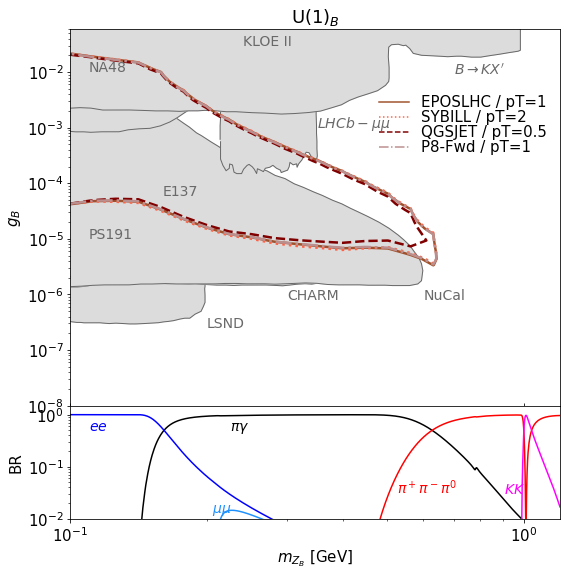

In [24]:
plot, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=[],
    title=r"U(1)$_{B}$", 
    linewidths=2.5,
    xlims = [0.1,1.2], 
    ylims=[10**-8,0.06],
    xlabel=r"$m_{Z_B}$ [GeV]", 
    ylabel=r"$g_{B}$",
    legendloc=(1,0.86),
    branchings=branchings,
    figsize=(8,8),
)

# points = np.array([
#     [0.40, 1.5e-4],
#     [0.40, 3.0e-5],
#     [0.40, 1.0e-5],
# ])
# ax.scatter(points.T[0],points.T[1],s=10, c="k", zorder=100)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("figures/"+modelname+".pdf")
plot.show()